In [ ]:
# 컬럼 정보 :

# MPG (miles per gallon),

# cylinders,

# engine displacement (cu. inches),

# horsepower,

# vehicle weight (lbs.),

# time to accelerate from O to 60 mph (sec.),

# model year (modulo 100),

# origin of car (1. American, 2. European,3. Japanese).

# Also provided are the car labels (types)

# Missing data values are marked by series of question marks.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [4]:
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


sb.regplot()데이터분석하기

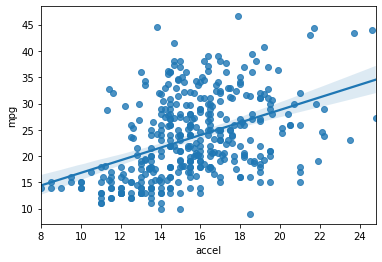

In [7]:
sb.regplot(data=df, x='accel', y='mpg')
plt.show()

sb.boxplot() 겹칠때 사용

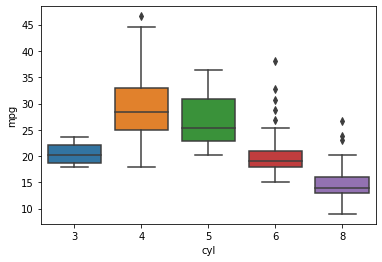

In [8]:
# 겹쳐서 보이는게 많은 차트는 
# sb.boxplot()을 활용한다
sb.boxplot(data=df, x='cyl', y='mpg')
plt.show()

In [9]:
#df NaN확인
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
 8   name    392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [13]:
X = df.iloc[ :, 1: 7+1]

In [16]:
X.shape

(392, 7)

In [14]:
y = df['mpg']

In [15]:
y.shape

(392,)

One Hot Encoding

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
# 6번째 컬럼인 origin의 데이터가 0 3, 2로 되어 있지만
# 학습하기에는 좋지않다
# 최적화를 위해서 One Hot Encoding을 해준다
X['origin'].unique()

array([1, 3, 2])

ColumnTransformer 객체생성

In [24]:
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(), [6] ) ], remainder='passthrough')

In [25]:
X = ct.fit_transform(X)

train_test_split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Linear Modeling

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:

regressor = LinearRegression()

regressor.fit() regressor.predict()

In [32]:
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred =regressor.predict(X_test)

In [36]:
#co-effecient
# 컬럼에서 x에 해당하는 컬럼을 채우고 나머지 미지수를 찾은 것을  보여줌
# y= ax +bx
regressor.coef_

array([-1.55370633,  0.83388251,  0.71982383, -0.38946904,  0.02158376,
       -0.01237154, -0.00700083,  0.12954429,  0.76774449])

In [37]:
regressor.intercept_

-16.203123000581133

regressor.score(X_test, y_test)

In [ ]:
#학습을 안 시킨 테스트용  X_test, y_test (결과값) 을 넘겨주면
# 스코어를 매겨준다

In [38]:
regressor.score(X_test, y_test)

0.8387519287083132

In [40]:
df1 = pd.read_csv('auto-mpg2.csv')

In [42]:
#위의 데이터 프레임은 중간에 문자에서 특이점이 있는 확인하는 법
df['horsepower'].unique()
# 중간에 '?'를 확인할 수 있음
# 하지만 데이터가 많으면 찾기 어려움 (직접 찾아야함 효율적이지 않음)

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

str.isdigit() 사용

In [43]:
# 숫자면 True 리턴
df['horsepower'].str.isdigit()

0      True
1      True
2      True
3      True
4      True
       ... 
393    True
394    True
395    True
396    True
397    True
Name: horsepower, Length: 398, dtype: bool

In [44]:
# 활용방법
df.loc [df['horsepower'].str.isdigit() == False, ]
# 나온 결과로 처리하면 됨


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


replace()활용

In [45]:
# '?'를 NaN으로 바꾸기, np.nan 속성 사용
df['horsepower'].replace('?', np.nan)

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

가장효과적인 pd.to_numeric (숫자로 바꾸기)

In [46]:
# 숫자로 바꾸는데 '?' 찾으면 없으면 빼 버릴 수 있음
# errors='coerce' 에러 무시 파라미터가 중요
pd.to_numeric( df['horsepower'], errors='coerce')
# 이렇게 하면 컬럼 데이터를 숫자로 바꿔준다
# 단 숫자로 해석 못하는 '?' 같은 놈들은 에러 무시로 넘어감

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

dropna() 또는 fillna() 활용

In [ ]:
# NaN이 있는 경우 그냥 삭제
dropna()

In [ ]:
# 데이터가 너무 적어질 경우는 반드시 데이터프레임의 row수를 확인한 후 
# 평균을 넣어주는 방법도 좋다
fillna( mean() )